# GROUP  MEMBERS
1- Doaa Mohamed    106413

2- Inês Leite      92928

3- Pedro Marques  92926

In [ ]:
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

# Turbo Engine data description

The engine under study is a turbofan engine (a jet engine). A turbofan engine has many components. A few important components are: Fan, Low Pressure Compressor (LPC), High Pressure Compressor (HPC), Low Pressure Turbine (LPT), High Pressure Turbine (HPT).

In [6]:
!pip install pandas
!pip install numpy
!pip install imblearn

https://www.youtube.com/watch?v=m7KWxX23zCU

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import zscore
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, f1_score, \
    roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.svm import SVC
import numpy as np

## Load Data

In [28]:
train = pd.read_csv(r'dataTopicF/train_FD001.csv', sep=';')
train

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,no
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,no
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,no
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,no
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,yes
20627,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,yes
20628,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,yes
20629,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,yes


In [29]:
test = pd.read_csv(r'dataTopicF\test_FD001.csv', sep=';')
test

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,no
1,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,no
2,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,no
3,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,no
4,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,yes
13092,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,yes
13093,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,yes
13094,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,yes


### Data Analysis
-Remove rows with missing values
-Remove duplicate rows
-Check features/types
  

In [6]:
print(f"Features: {list(train.columns)}")
print(f"Entries in train dataset: {train.shape[0]}")
print(f"Missing Values in train dataset: {train.isna().sum().sum()}")
print(f"Duplicate rows in train dataset: {train[train.duplicated(keep=False)].shape[0]}")
print()
print(f"Entries in test dataset: {test.shape[0]}")
print(f"Missing Values in test dataset: {test.isna().sum().sum()}")
print(f"Duplicate rows in test dataset: {test[test.duplicated(keep=False)].shape[0]}")

Features: ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'Failure_status']
Entries in train dataset: 20631
Missing Values in train dataset: 0
Duplicate rows in train dataset: 0

Entries in test dataset: 13096
Missing Values in test dataset: 0
Duplicate rows in test dataset: 0


In [7]:
print(f"Train dataset: Failure Status\n {train.iloc[:, train.shape[1]-1].value_counts()}")

Train dataset: Failure Status
 no     17531
yes     3100
Name: Failure_status, dtype: int64


In [8]:
print(f"Test dataset: Failure Status\n {test.iloc[:, test.shape[1]-1].value_counts()}")

Test dataset: Failure Status
 no     8810
yes    4286
Name: Failure_status, dtype: int64


As we can see, the data is imbalanced in both datasets, furthermore we can actually visualize this disparity below

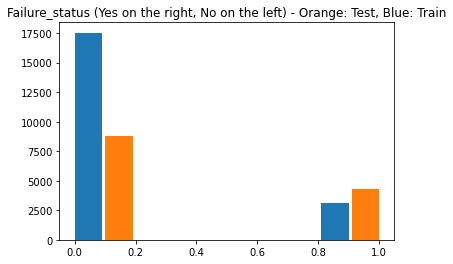

In [9]:
x = train['Failure_status'].map({'yes':0.9,'no':0})
a=x
plt.hist(a)

x = test['Failure_status'].map({'yes':1,'no':0.1})
a=x
plt.hist(a)

plt.title('Failure_status (Yes on the right, No on the left) - Orange: Test, Blue: Train')
plt.show()

# Pre Processing


In [30]:
cols = train.select_dtypes(include=[float, int]).columns
train_max = train.select_dtypes(include=[float, int]).max()
train_min = train.select_dtypes(include=[float, int]).min()
variance = (train_max - train_min)


dont_use_cols = [x for x in cols if variance[x] == 0]
print(f"Features with no variance: {dont_use_cols}")

#These features provide no useful value to the model, so they are dropped
train = train.drop(columns=dont_use_cols)
test = test.drop(columns=dont_use_cols)

Features with no variance: ['setting3', 's1', 's5', 's10', 's16', 's18', 's19']


#### Normalization
Values for each feature are really diverse and need to be normalized, below are all the values for the train dataset for all features excluding the ones with no variance

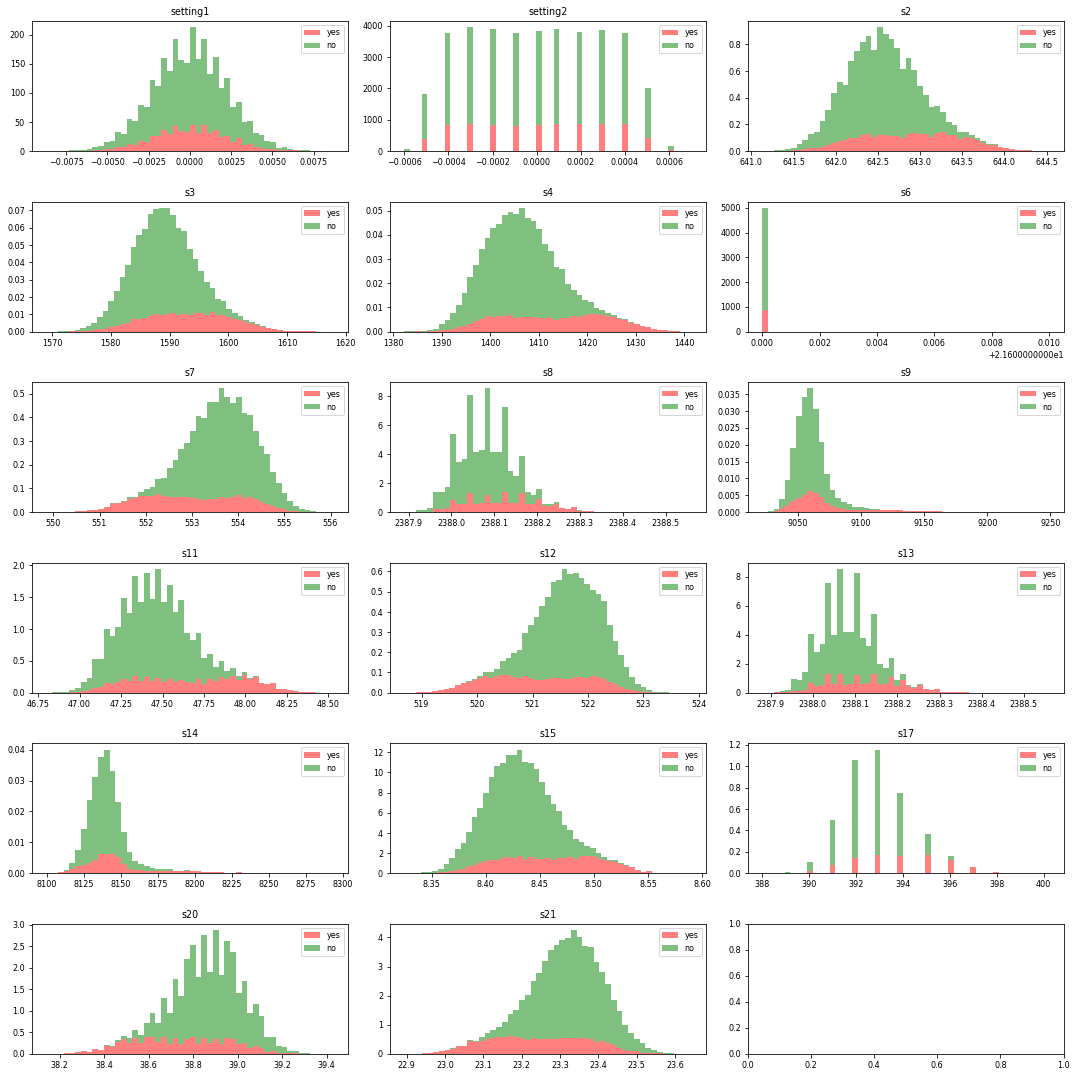

In [40]:
#Joining both datasets to check values
df = pd.concat([train, test])
features_mean = train.select_dtypes(include=[float, int]).columns
# Separating the data 
df_yes=df[df['Failure_status'] =="yes"]
df_no=df[df['Failure_status'] =="no"]

#Creating the window with all subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
axes = axes.ravel()
#Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    
    if idx<len(features_mean):
        ax.figure
        binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
        ax.hist([df_yes[features_mean[idx]],df_no[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density= True, label=['yes','no'],color=['r','g'])
        ax.legend(loc='upper right')
        ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

These values need to be normalized, we use the zscore

In [59]:

X_train = train.iloc[:, :train.shape[1]-1]
Y_train = train.iloc[:, train.shape[1]-1]
X_train = X_train.apply(zscore)
X_train

,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,-0.315980,-1.372953,-1.721725,-0.134255,-0.925936,0.141683,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,0.872722,-1.031720,-1.061780,0.211528,-0.643726,0.141683,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,-1.961874,1.015677,-0.661813,-0.413166,-0.525953,0.141683,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,0.324090,-0.008022,-0.661813,-1.261314,-0.784831,0.141683,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,-0.864611,-0.690488,-0.621816,-1.251528,-0.301518,0.141683,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.178822,-1.031720,1.618000,1.216258,2.188375,0.141683,-2.189329,1.315066,0.012547,1.980044,-2.607969,2.278282,-0.322542,1.425294,2.446751,-1.805173,-2.921113
20627,-0.727453,-1.714186,1.717992,2.279706,2.738351,0.141683,-2.833345,1.878576,-0.006020,1.867718,-2.350355,1.722087,-0.380207,1.913240,1.155367,-2.856395,-1.203764
20628,0.186933,-0.008022,1.478011,1.946971,2.138377,0.141683,-2.742957,2.019453,0.029755,2.054927,-1.902919,2.000184,-0.141684,3.265092,3.092444,-2.081810,-3.292481
20629,-0.498857,1.015677,1.098043,2.403666,1.955051,0.141683,-3.036719,2.160330,0.383884,3.178182,-2.363913,1.861136,-0.233948,2.579834,1.155367,-2.911722,-2.085072


In [58]:
X_test = test.iloc[:, :test.shape[1]-1]
Y_test = test.iloc[:, test.shape[1]-1]
X_test = X_test.apply(zscore)
X_test

,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1.049295,1.005927,1.359276,-0.561495,-0.975674,0.17566,0.209138,-0.539078,-0.720312,-1.103591,-0.049542,-0.720590,-1.315031,-0.711659,-0.463406,-0.229408,0.448866
1,-1.220748,-1.034755,-1.908502,0.070116,-1.392836,0.17566,1.603612,-1.061366,-0.348673,0.427727,0.736727,-0.193647,0.065977,-1.570037,0.347276,0.899934,0.664042
2,0.141278,0.325700,-0.037636,-0.231698,-0.507676,0.17566,0.517390,-0.364982,-0.126564,0.427727,0.397202,-0.720590,-0.868436,0.629340,0.347276,1.323438,0.961247
3,1.911912,-0.014414,-0.087526,-0.795350,0.251888,0.17566,0.458675,-0.713174,-1.147041,-0.695239,-0.657113,-0.369295,-0.593609,-1.177045,-1.274088,0.758766,0.451244
4,0.640688,-0.014414,0.087088,-0.181729,-0.420954,0.17566,0.590783,-1.061366,-1.211750,-0.542108,0.718857,-0.720590,-0.923402,-0.784053,-2.084769,0.688182,0.918450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,2.229718,-0.014414,1.908063,2.268760,1.652893,0.17566,-0.510118,-0.887270,7.342072,1.397561,-1.890124,-1.247533,7.295898,1.573900,1.157958,-1.711671,-1.644645
13092,-0.494334,-0.354527,1.858174,1.517224,2.588890,0.17566,-0.789013,-0.364982,7.194290,0.938166,-1.246814,0.333296,7.057387,0.874098,1.968639,-2.276342,-0.697156
13093,-0.267330,-1.034755,2.406961,1.009537,0.311696,0.17566,-1.053229,0.679594,7.730325,0.785034,-1.014507,-0.544942,7.684582,1.070594,1.968639,-1.923422,-1.553106
13094,-1.720158,0.325700,1.957953,1.377310,2.186681,0.17566,-0.568833,-0.016790,7.908712,0.989210,-0.746461,0.157648,8.002597,1.560111,1.968639,-1.641087,-0.782751


['setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']


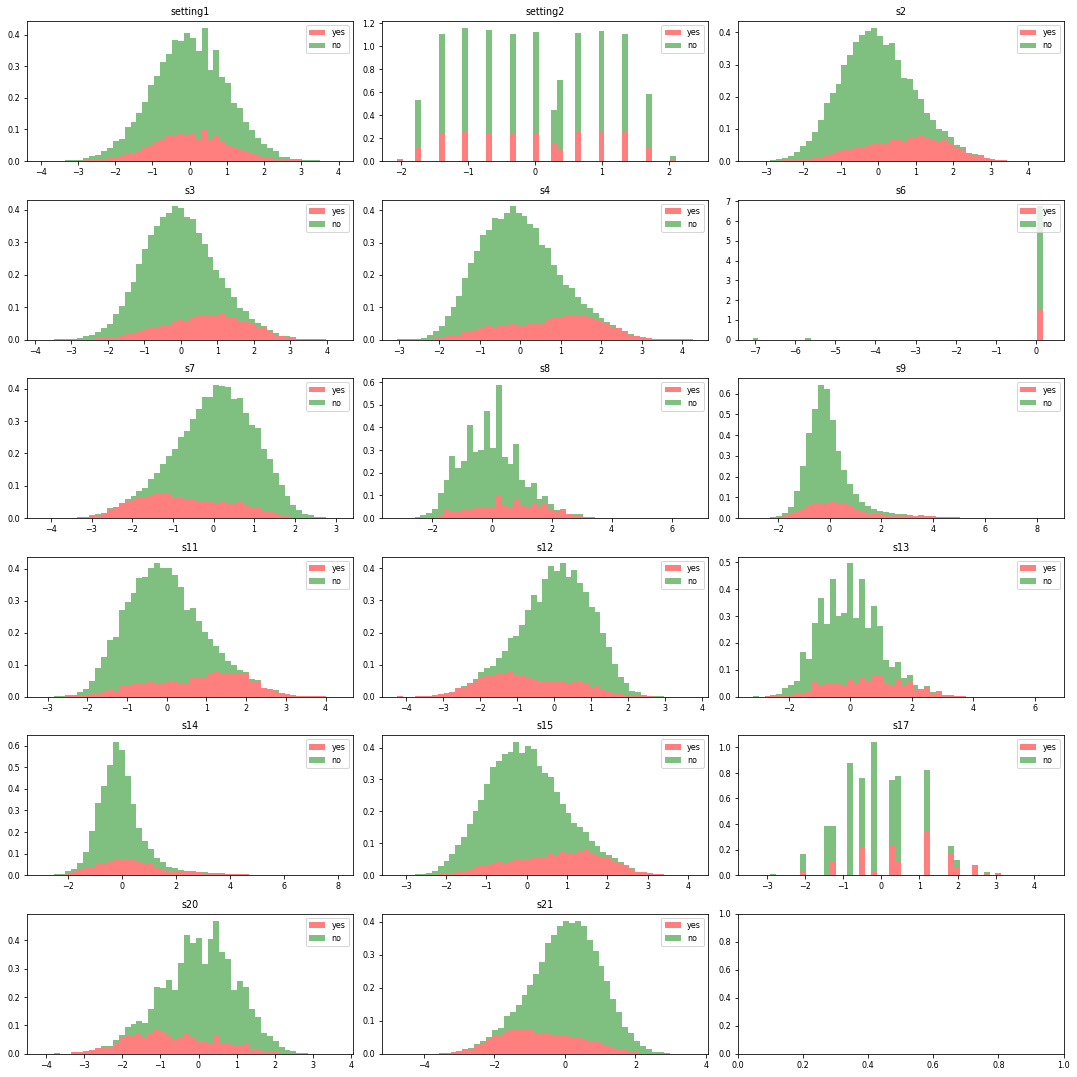

In [61]:
#Joining all datasets to check values
train = X_train.assign(Failure_status = Y_train)
test =  X_test.assign(Failure_status = Y_test)


df = pd.concat([train, test])
features_mean = train.select_dtypes(include=[float, int]).columns
print(list(features_mean))
# Separating the data 
df_yes=df[df['Failure_status'] =="yes"]
df_no=df[df['Failure_status'] =="no"]

#Creating the window with all subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
axes = axes.ravel()
#Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    
    if idx<len(features_mean):
        ax.figure
        binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
        ax.hist([df_yes[features_mean[idx]],df_no[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density= True, label=['yes','no'],color=['r','g'])
        ax.legend(loc='upper right')
        ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

# Dealing With Imbalanced Data

In [5]:
# Fix the imbalance problem
# Separate majority and minority classes

df_train_maj = df_train[df_train.Failure_status=='no']
df_train_min = df_train[df_train.Failure_status=='yes']
 
# Upsample minority class
df_train_min_upsampled = resample(df_train_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=17531,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_train = pd.concat([df_train_maj, df_train_min_upsampled])
 
# Display new class counts
df_train.Failure_status.value_counts()

no     17531
yes    17531
Name: Failure_status, dtype: int64

In [6]:
# Fix the imbalance problem
# Separate majority and minority classes

df_test_maj = df_test[df_test.Failure_status=='no']
df_test_min = df_test[df_test.Failure_status=='yes']
 
# Upsample minority class
df_test_min_upsampled = resample(df_test_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=8810,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_test = pd.concat([df_test_maj, df_test_min_upsampled])
 
# Display new class counts
df_test.Failure_status.value_counts()

yes    8810
no     8810
Name: Failure_status, dtype: int64

# under Sample

In [13]:
# Class count
count_class_0, count_class_1 = df_train.Failure_status.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Failure_status'] == 'no']
df_class_1 = df_train[df_train['Failure_status'] == 'yes']



In [14]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_train = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train.Failure_status.value_counts())

Random under-sampling:
yes    3100
no     3100
Name: Failure_status, dtype: int64


In [15]:
# Class count
count_class_0_test, count_class_1_test = df_test.Failure_status.value_counts()

# Divide by class
df_class_0_test = df_test[df_test['Failure_status'] == 'no']
df_class_1_test = df_test[df_test['Failure_status'] == 'yes']


In [16]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under_test = df_class_0_test.sample(count_class_1_test)
df_test = pd.concat([df_class_0_under_test, df_class_1_test], axis=0)

print('Random under-sampling:')
df_test.Failure_status.value_counts()

Random under-sampling:


yes    4286
no     4286
Name: Failure_status, dtype: int64

# SMOTE Method

In [16]:
X_train = df_train.drop('Failure_status',axis='columns')
Y_train = df_train['Failure_status']

In [18]:
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE 

smote = SMOTE(sampling_strategy='minority')
X_train, Y_train = smote.fit_resample(X_train, Y_train)

Y_train.value_counts()

yes    17531
no     17531
Name: Failure_status, dtype: int64

In [12]:
X_test = df_test.drop('Failure_status',axis='columns')
Y_test = df_test['Failure_status']

In [19]:
smote_test = SMOTE(sampling_strategy='minority')
X_test, Y_test = smote_test.fit_resample(X_test, Y_test)

Y_test.value_counts()

yes    8810
no     8810
Name: Failure_status, dtype: int64

# 

## Data Extraction
- obtain the X features and Y target variables for training and test datasets

In [7]:
#define the training dataset
X_train = df_train.iloc[:,0:-1]
Y_train = df_train.iloc[:,-1]

In [11]:
#define the test dataset
X_test = df_test.iloc[:,0:-1]
Y_test = df_test.iloc[:,-1]

In [14]:
print(f"Dataset     | Size/Length")
print("-"*40)
print(f"Training X  | {X_train.shape}")
print(f"Training y  | {Y_train.shape}")
print(f"Testing X   | {X_test.shape}")
print(f"Testing y   | {Y_test.shape}")

Dataset     | Size/Length
----------------------------------------
Training X  | (35062, 24)
Training y  | (35062,)
Testing X   | (17620, 24)
Testing y   | (17620,)


# Normalization of the features

    Train: fit and transform
    Test: transform (using the parameters estimated on fit).

In [15]:
mms = MinMaxScaler()
# Train fit and transform. Test only transform.
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)


In [16]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Building Random Forest

In [19]:
RF = RandomForestClassifier()

In [20]:
RF.fit(X_train_std,Y_train)

RandomForestClassifier()

<AxesSubplot:>

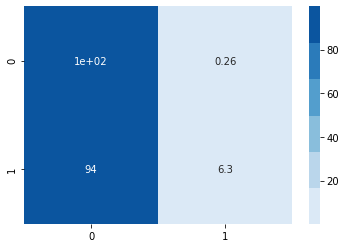

In [21]:
Y_pred_RF = RF.predict(X_test_std)

#create the confusion matrix

cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True,cmap=colormap)



In [26]:
accuracy_score(Y_test, Y_pred_RF)
print(f"Accuracy: {(accuracy_score(Y_test, Y_pred_RF)*100)}%")

Accuracy: 54.95800279981334%


In [27]:
print(classification_report(Y_test,Y_pred_RF))

              precision    recall  f1-score   support

          no       0.53      0.99      0.69      4286
         yes       0.93      0.11      0.19      4286

    accuracy                           0.55      8572
   macro avg       0.73      0.55      0.44      8572
weighted avg       0.73      0.55      0.44      8572



# BUILD OPTIMAL SVM CLASSIFIER
- Preliminary / Unoptimized Model
- Model Parameters Optimization
- Final Optimized Model and Conclusion

## Preliminary / Unoptimized Model
- build an unoptimized svm classifier for the training dataset
- plot and draw confusion matrix to see how it performs on the testing dataset.
- analyze clasification report.
- evaluate model performance

In [28]:
clf_svm_unoptimized = SVC(random_state=42)
clf_svm_unoptimized.fit(X_train_std, Y_train)

SVC(random_state=42)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Unoptimized Confusion Matrix')

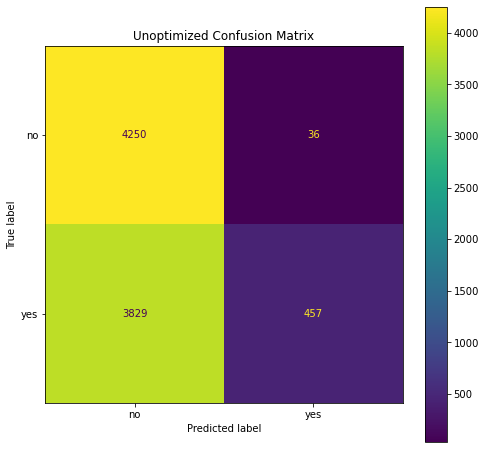

In [29]:
fig, ax = plt.subplots(figsize=(8,8))

plot_confusion_matrix(
    clf_svm_unoptimized,
    X_test_std,
    Y_test,
    values_format='d',
    ax=ax
)
plt.title('Unoptimized Confusion Matrix') 

## Model Performance (Unoptimized)
- obtain predicted values given the test data
- compute the accuracy of the classifier
- obtain the classification report

In [30]:
preds = clf_svm_unoptimized.predict(X_test_std)
print(f"Accuracy: {(accuracy_score(Y_test,preds)*100)}%")

Accuracy: 54.911339244050396%


In [31]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

          no       0.53      0.99      0.69      4286
         yes       0.93      0.11      0.19      4286

    accuracy                           0.55      8572
   macro avg       0.73      0.55      0.44      8572
weighted avg       0.73      0.55      0.44      8572



## Optimize SVM parameters
- we define some set of dafault values for the parameters C and gamma and the kernels to check for best fit.
- the best kernel turned out to be 'rbf'. All the time.

In [117]:
#this take long time for my laptop so, i assumed the below values
#but i will try to check it latter again
"""
param_grid = [
    {
        'C':[0.5,1,10],
        'gamma':['scale',1, 0.1, 0.01, 0.001],
        'kernel':['rbf'] # ['rbf','poly','linear']
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

C,g,k = optimal_params.fit(X_train, Y_train).best_params_.values()
""""

SyntaxError: EOL while scanning string literal (<ipython-input-117-9bc8ec5ae3be>, line 20)

In [ ]:
print(f"C = {C}")
print(f"gamma = {g}")
print(f"kernel = {k}")

In [33]:
C = 100
g = 0.01
k = 'rbf'

## Final SVM with optimal parameters
- refit the svm model with the optimal parameters acquired.
- an overall improvement compared to the prior unoptimized svm model.

In [34]:
clf_svm = SVC(random_state=42, C=C, gamma=g, kernel=k)
clf_svm.fit(X_train_std, Y_train)

SVC(C=100, gamma=0.01, random_state=42)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Optimized Confusion Matrix')

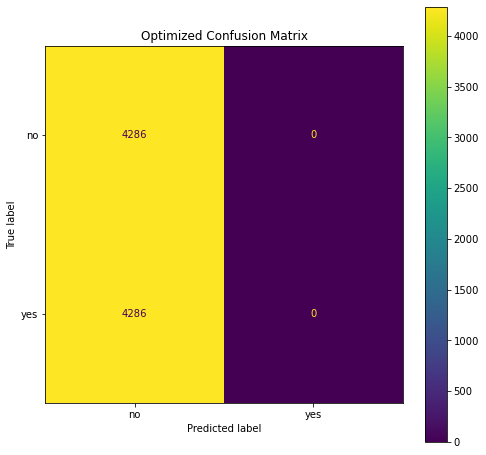

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(
    clf_svm,
    X_test,
    Y_test,
    values_format='d',
    
    ax=ax
)

plt.title('Optimized Confusion Matrix') 

## Model Performance (Optimized)
- obtain predicted values given the test data
- compute the accuracy of the classifier
- obtain the classification report

In [36]:
preds = clf_svm.predict(X_test_std)
print(f"Accuracy: {(accuracy_score(Y_test,preds)*100)}%")

Accuracy: 55.109659356042926%


In [37]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

          no       0.53      0.99      0.69      4286
         yes       0.93      0.11      0.20      4286

    accuracy                           0.55      8572
   macro avg       0.73      0.55      0.44      8572
weighted avg       0.73      0.55      0.44      8572



## Multi-Layer Perceptron Neural Network 

In [118]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df_train['Failure_status']=le.fit_transform(df_train['Failure_status'])
df_test['Failure_status']=le.fit_transform(df_test['Failure_status'])

In [122]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train_std,Y_train)

Iteration 1, loss = 12.60914332
Iteration 2, loss = 0.69674212
Iteration 3, loss = 0.69383104
Iteration 4, loss = 0.70090496
Iteration 5, loss = 0.69325214
Iteration 6, loss = 0.69321387
Iteration 7, loss = 0.69318151
Iteration 8, loss = 0.69316300
Iteration 9, loss = 0.69315413
Iteration 10, loss = 0.69317360
Iteration 11, loss = 0.69318585
Iteration 12, loss = 0.69326691
Iteration 13, loss = 0.69329317
Iteration 14, loss = 0.69315865
Iteration 15, loss = 0.69316786
Iteration 16, loss = 0.69318151
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [123]:
# Make prediction on test dataset
ypred=clf.predict(X_test_std)

# Calcuate accuracy
accuracy_score(Y_test,ypred)

0.5

In [124]:
print(classification_report(Y_test,ypred))

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.00      0.00      0.00      4286
         yes       0.50      1.00      0.67      4286

    accuracy                           0.50      8572
   macro avg       0.25      0.50      0.33      8572
weighted avg       0.25      0.50      0.33      8572



In [ ]:
https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/